#### Download a dataset

In [102]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


#### Vectorizing

In [103]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [104]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 1 HIDDEN LAYER

In [15]:
#16 units
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

# 2 HIDDEN LAYERS

In [11]:
#16 units
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 3 HIDDEN LAYERS 

In [22]:
#16 units
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### Validation

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 15s 1ms/step - loss: 0.5487 - acc: 0.7730 - val_loss: 0.4519 - val_acc: 0.8076
Epoch 2/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.3288 - acc: 0.8983 - val_loss: 0.3191 - val_acc: 0.8790
Epoch 3/20
15000/15000 [==============================] - 5s 342us/step - loss: 0.2325 - acc: 0.9237 - val_loss: 0.2753 - val_acc: 0.8928
Epoch 4/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.1747 - acc: 0.9449 - val_loss: 0.2788 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.1413 - acc: 0.9548 - val_loss: 0.2820 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 5s 343us/step - loss: 0.1108 - acc: 0.9668 - val_loss: 0.3060 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.0905 - acc: 0.9731 - val_loss: 0.3268 - v

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

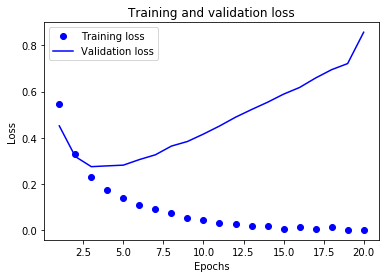

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

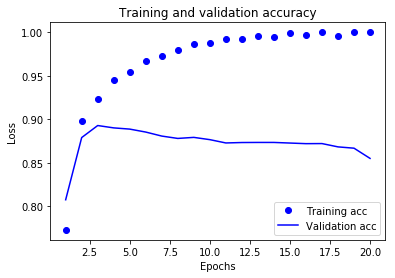

In [31]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 2 HIDDEN LAYERS 

In [32]:
#32 units
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 168s 7ms/step - loss: 0.4229 - acc: 0.8207
Epoch 2/4
25000/25000 [==============================] - 7s 280us/step - loss: 0.2401 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 6s 256us/step - loss: 0.1903 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 117s 5ms/step


# 2 HIDDEN LAYERS 

In [33]:
#64 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 393s 16ms/step - loss: 0.4169 - acc: 0.8114
Epoch 2/4
25000/25000 [==============================] - 14s 560us/step - loss: 0.2335 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 9s 356us/step - loss: 0.1903 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 101s 4ms/step


# 2 HIDDEN LAYERS 

In [105]:
#128 units
model_2_128 = models.Sequential()
model_2_128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_2_128.add(layers.Dense(128, activation='relu'))
model_2_128.add(layers.Dense(1, activation='sigmoid'))

model_2_128.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_2_128.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_2_128.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 25s 994us/step - loss: 0.4238 - acc: 0.8006
Epoch 2/4
25000/25000 [==============================] - 12s 462us/step - loss: 0.2319 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 11s 424us/step - loss: 0.1635 - acc: 0.9371
Epoch 4/4
25000/25000 [==============================] - 22s 875us/step


# MSE LOSS FUNCTION

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 389s 16ms/step - loss: 0.1353 - binary_accuracy: 0.8081
Epoch 2/4
25000/25000 [==============================] - 16s 637us/step - loss: 0.0682 - binary_accuracy: 0.9113
Epoch 3/4
25000/25000 [==============================] - 7s 296us/step - loss: 0.0536 - binary_accuracy: 0.9326
Epoch 4/4
25000/25000 [==============================] - 98s 4ms/step


# TANH ACTIVATION FUNCTION

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

'''model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])'''

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 177s 7ms/step - loss: 0.4036 - binary_accuracy: 0.8247
Epoch 2/4
25000/25000 [==============================] - 13s 510us/step - loss: 0.2229 - binary_accuracy: 0.91205s - loss: 0.2181 - b
Epoch 3/4
25000/25000 [==============================] - 8s 314us/step - loss: 0.1851 - binary_accuracy: 0.9288
Epoch 4/4
25000/25000 [==============================] - 74s 3ms/step


###### RESULTS
1. Наиболее точные результаты показывает сетка с двумя hidden  layers. Думаю, что это связано с тем, что 1 скрытые слой дает риск недообучения, а при добавлении 3 скрытого слоя значения функции потерь увеличиваются -  сеть хуже предсказывает значения, риск переобучения, возможно. 
Говоря о количестве юнитов (нейронах), схожие результаты показали сетки с использованием 16 units и 32 units. При использовании 64 units модель начинает переобучаться.  
2. Функция MSE показала себя лучше чем binary_crossentropy - значения функции потерь меньше. 

#### Hometask 2

In [74]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)




In [75]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [87]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [88]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1 HIDDEN LAYER

In [89]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_1_layer = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 668us/step - loss: 1.8689 - acc: 0.6362 - val_loss: 1.2009 - val_acc: 0.7270
Epoch 2/20
7982/7982 [==============================] - 4s 445us/step - loss: 0.9378 - acc: 0.8047 - val_loss: 0.9695 - val_acc: 0.8010
Epoch 3/20
7982/7982 [==============================] - 4s 541us/step - loss: 0.6365 - acc: 0.8686 - val_loss: 0.8608 - val_acc: 0.8200
Epoch 4/20
7982/7982 [==============================] - 4s 516us/step - loss: 0.4528 - acc: 0.9063 - val_loss: 0.8317 - val_acc: 0.8170
Epoch 5/20
7982/7982 [==============================] - 4s 461us/step - loss: 0.3376 - acc: 0.9292 - val_loss: 0.8210 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 4s 519us/step - loss: 0.2618 - acc: 0.9407 - val_loss: 0.8034 - val_acc: 0.8430
Epoch 7/20
7982/7982 [==============================] - 5s 656us/step - loss: 0.2162 - acc: 0.9479 - val_loss: 0.8302 - val_acc: 0.8360


# 2 HIDDEN LAYERS

In [90]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_2_layers = model2.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 779us/step - loss: 1.8419 - acc: 0.6253 - val_loss: 1.2206 - val_acc: 0.7380
Epoch 2/20
7982/7982 [==============================] - 4s 457us/step - loss: 0.9481 - acc: 0.7987 - val_loss: 1.0120 - val_acc: 0.7850
Epoch 3/20
7982/7982 [==============================] - 4s 474us/step - loss: 0.6281 - acc: 0.8677 - val_loss: 0.9127 - val_acc: 0.8100
Epoch 4/20
7982/7982 [==============================] - 5s 616us/step - loss: 0.4300 - acc: 0.9087 - val_loss: 0.8805 - val_acc: 0.8160
Epoch 5/20
7982/7982 [==============================] - 6s 703us/step - loss: 0.3145 - acc: 0.9326 - val_loss: 0.8842 - val_acc: 0.8130
Epoch 6/20
7982/7982 [==============================] - 5s 600us/step - loss: 0.2453 - acc: 0.9444 - val_loss: 0.8843 - val_acc: 0.8340
Epoch 7/20
7982/7982 [==============================] - 4s 482us/step - loss: 0.2042 - acc: 0.9468 - val_loss: 0.9352 - val_acc: 0.8210


# 3 HIDDEN LAYERS

In [92]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_3_layers = model3.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 722us/step - loss: 1.8337 - acc: 0.6115 - val_loss: 1.2708 - val_acc: 0.7050
Epoch 2/20
7982/7982 [==============================] - 4s 449us/step - loss: 0.9798 - acc: 0.7737 - val_loss: 1.1415 - val_acc: 0.7360
Epoch 3/20
7982/7982 [==============================] - 4s 472us/step - loss: 0.6577 - acc: 0.8558 - val_loss: 0.9477 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 4s 467us/step - loss: 0.4615 - acc: 0.9018 - val_loss: 0.9340 - val_acc: 0.8100
Epoch 5/20
7982/7982 [==============================] - 4s 467us/step - loss: 0.3375 - acc: 0.9260 - val_loss: 1.0363 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 4s 474us/step - loss: 0.2611 - acc: 0.9407 - val_loss: 0.9952 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 4s 475us/step - loss: 0.2190 - acc: 0.9478 - val_loss: 1.0827 - val_acc: 0.8040


In [93]:
results1 = model.evaluate(x_test, y_test)
results2 = model2.evaluate(x_test, y_test)
results3 = model3.evaluate(x_test, y_test)
print(results1)
print(results2)
print(results3)

2246/2246 [==============================] - 1s 348us/step
[1.3345707462816927, 0.7853962600708857]
[1.4700521401603204, 0.77025823686553874]
[1.5067622767743105, 0.7822796082454182]


# 2 HIDDEN LAYERS 

In [95]:
#32 units
model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(32, activation='relu'))
model32.add(layers.Dense(46, activation='softmax'))

model32.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history32 = model32.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 622us/step - loss: 2.2997 - acc: 0.5551 - val_loss: 1.4805 - val_acc: 0.6700
Epoch 2/20
7982/7982 [==============================] - 3s 351us/step - loss: 1.2432 - acc: 0.7301 - val_loss: 1.1858 - val_acc: 0.7410
Epoch 3/20
7982/7982 [==============================] - 3s 349us/step - loss: 0.9331 - acc: 0.7978 - val_loss: 1.0447 - val_acc: 0.7740
Epoch 4/20
7982/7982 [==============================] - 3s 345us/step - loss: 0.7190 - acc: 0.8418 - val_loss: 0.9829 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 3s 337us/step - loss: 0.5591 - acc: 0.8750 - val_loss: 0.9422 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 3s 331us/step - loss: 0.4409 - acc: 0.9018 - val_loss: 0.9204 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 3s 343us/step - loss: 0.3527 - acc: 0.9247 - val_loss: 0.9155 - val_acc: 0.8170


# 2 HIDDEN LAYERS 

In [96]:
#64 units
model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model64.add(layers.Dense(64, activation='relu'))
model64.add(layers.Dense(46, activation='softmax'))

model64.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history64 = model64.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 733us/step - loss: 1.9264 - acc: 0.5968 - val_loss: 1.2453 - val_acc: 0.7370
Epoch 2/20
7982/7982 [==============================] - 4s 500us/step - loss: 0.9949 - acc: 0.7845 - val_loss: 1.0303 - val_acc: 0.7720
Epoch 3/20
7982/7982 [==============================] - 4s 469us/step - loss: 0.6747 - acc: 0.8538 - val_loss: 0.9255 - val_acc: 0.8120
Epoch 4/20
7982/7982 [==============================] - 4s 492us/step - loss: 0.4696 - acc: 0.9002 - val_loss: 0.8729 - val_acc: 0.8140
Epoch 5/20
7982/7982 [==============================] - 4s 471us/step - loss: 0.3401 - acc: 0.9261 - val_loss: 0.8790 - val_acc: 0.8260
Epoch 6/20
7982/7982 [==============================] - 4s 505us/step - loss: 0.2613 - acc: 0.9404 - val_loss: 0.9470 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 4s 498us/step - loss: 0.2132 - acc: 0.9488 - val_loss: 0.9358 - val_acc: 0.8130


# 2 HIDDEN LAYERS 

In [97]:
#128 units
model128 = models.Sequential()
model128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model128.add(layers.Dense(128, activation='relu'))
model128.add(layers.Dense(46, activation='softmax'))

model128.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history128 = model128.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 1ms/step - loss: 1.6136 - acc: 0.6604 - val_loss: 1.0882 - val_acc: 0.7570
Epoch 2/20
7982/7982 [==============================] - 6s 705us/step - loss: 0.7640 - acc: 0.8339 - val_loss: 0.9091 - val_acc: 0.7940
Epoch 3/20
7982/7982 [==============================] - 5s 670us/step - loss: 0.4459 - acc: 0.9048 - val_loss: 0.8621 - val_acc: 0.8330
Epoch 4/20
7982/7982 [==============================] - 5s 670us/step - loss: 0.3005 - acc: 0.9349 - val_loss: 0.9041 - val_acc: 0.8170
Epoch 5/20
7982/7982 [==============================] - 5s 682us/step - loss: 0.2265 - acc: 0.9454 - val_loss: 0.8959 - val_acc: 0.8220
Epoch 6/20
7982/7982 [==============================] - 5s 682us/step - loss: 0.1879 - acc: 0.9494 - val_loss: 0.9474 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 5s 681us/step - loss: 0.1678 - acc: 0.9524 - val_loss: 1.0801 - val_acc: 0.7950
Ep

In [99]:
results32 = model32.evaluate(x_test, y_test)
print(results32)
results64 = model64.evaluate(x_test, y_test)
print(results64)
results128 = model128.evaluate(x_test, y_test)
print(results128)

2246/2246 [==============================] - 1s 326us/step
[1.3886601865450825, 0.77159394479073906]
2246/2246 [==============================] - 1s 346us/step
[1.4074819223857413, 0.78272484416740873]
2246/2246 [==============================] - 1s 377us/step
[1.6074163905234604, 0.78049866434515103]


##### RESULTS
1. Наиболее высокая точность у моделей с использованием 64 units. Хоть разница и малоразличима, если сравнивать с 128 units. 
2. Касательно количества скрытых слоев - наиболее хорошо себя показала модель с 1 hidden layer. При увеличении числа слоев модель начинает переобучаться. Функция потерь увеличивает свои значения. Скорее всего, это связано с тем, что выборка небольшая, и использования 1 слоя с 64 нейронами достаточно. 